In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

In [ ]:
(X_train, Y_train),(X_test, Y_test)=tf.keras.datasets.fashion_mnist.load_data()
print(X_train.shape, Y_train.shape, "*****************", X_test.shape, Y_test.shape)
print(X_train[0])
print(Y_train[0])       # it gives the number of class label

class_labels = ['t-shirt/top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
print(class_labels)

In [ ]:
plt.figure()
plt.imshow(X_train[300])
plt.colorbar()          # It shows the image of the particular index in RGB format
plt.show()
print(X_train[0])
X_train=X_train/255
X_test=X_test/255
print(X_train[0])

In [ ]:
plt.imshow(X_train[300],cmap='Greys')     
plt.show()   
j=1                              # all images in the range are plotted in a loop 
for i in np.random.randint(0,1000,25) :         # plotting only 25 images between 0 and 1000
    plt.subplot(5,5,j);j+=1
    plt.imshow(X_train[i],cmap='Greys')
    plt.axis('off')       
    plt.title('{}/{}'.format(class_labels[Y_train[i]],Y_train[i]))
    plt.show()

print(X_train.ndim)
X_train = np.expand_dims(X_train,-1)

X_train=X_train/255
X_test=X_test/255
""" This dataset is predefined hence preprocessing is not required"""

from sklearn.model_selection import train_test_split
X_train, X_validation, Y_train, Y_validation = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 2020)
print(X_train.shape, X_validation.shape, Y_train.shape, Y_validation.shape)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

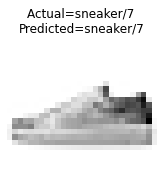

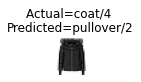

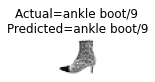

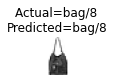

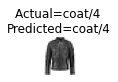

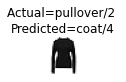

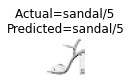

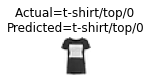

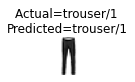

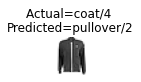

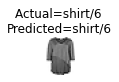

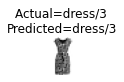

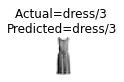

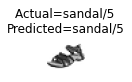

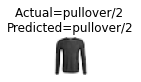

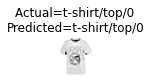

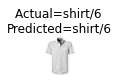

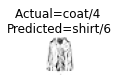

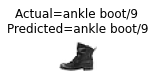

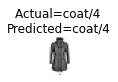

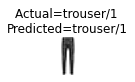

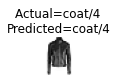

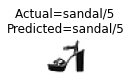

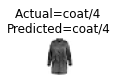

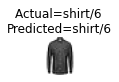

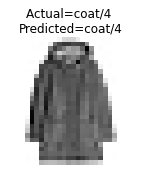

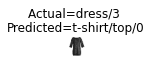

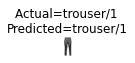

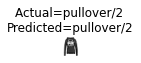

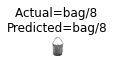

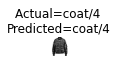

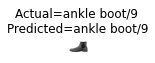

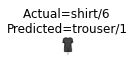

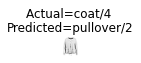

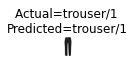

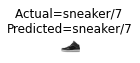

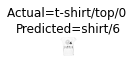

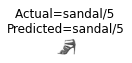

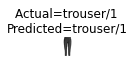

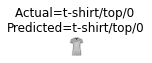

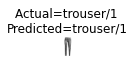

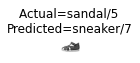

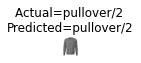

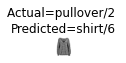

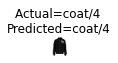

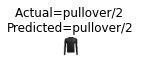

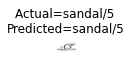

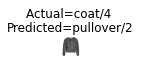

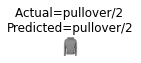

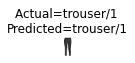

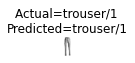

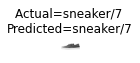

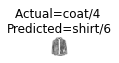

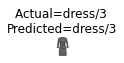

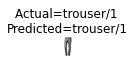

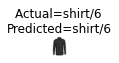

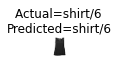

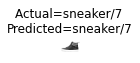

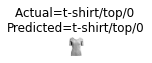

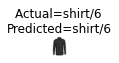

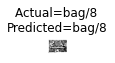

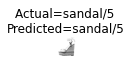

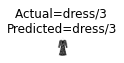

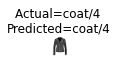

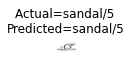

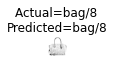

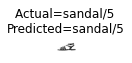

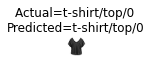

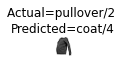

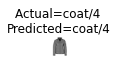

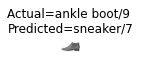

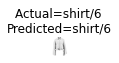

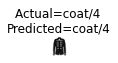

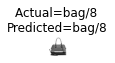

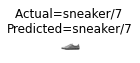

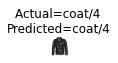

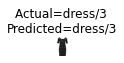

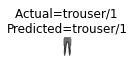

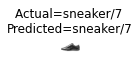

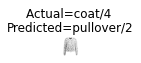

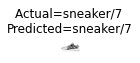

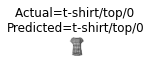

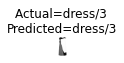

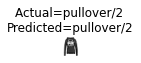

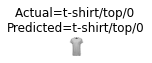

              precision    recall  f1-score   support

 t-shirt/top       0.77      0.76      0.76      1000
     trouser       0.95      0.91      0.93      1000
    pullover       0.67      0.53      0.59      1000
       dress       0.77      0.81      0.79      1000
        coat       0.65      0.67      0.66      1000
      sandal       0.92      0.85      0.88      1000
       shirt       0.42      0.47      0.44      1000
     sneaker       0.84      0.89      0.86      1000
         bag       0.92      0.94      0.93      1000
  ankle boot       0.89      0.92      0.90      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.78     10000
weighted avg       0.78      0.77      0.78     10000



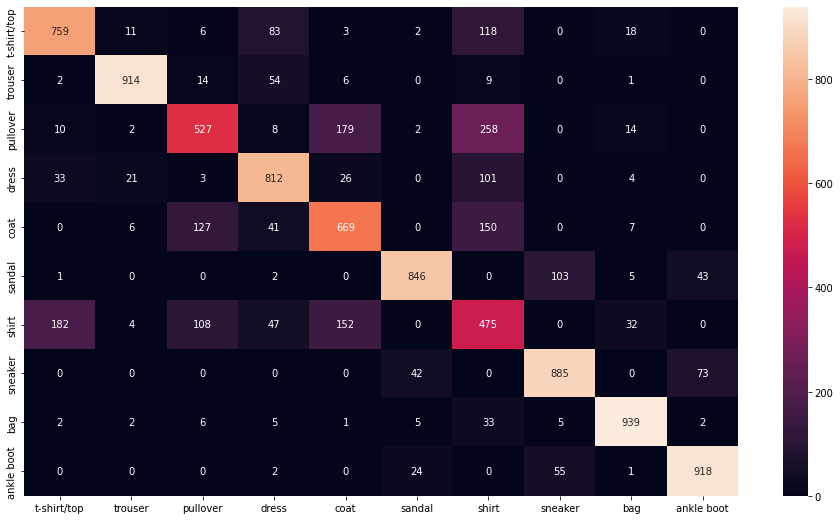

In [5]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10,activation='softmax')
])

model.summary()
model.compile(optimizer='adam',loss= 'sparse_categorical_crossentropy',metrics=['accuracy'])
# adam optimizer is used for optimization purpose

# Training the model
model.fit(X_train,Y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_validation,Y_validation))
""" epochs is the number of iterations we perform to get a better accuracy"""
Y_pred = model.predict(X_test)
Y_pred.round(2)
print(Y_test)
model.evaluate(X_test,Y_test)   # gives the final accuracy
""" Accuracy alone is not a perfect measure to predict if the model is correct or not. Thus we use the concept of confusion matrix"""

# Evaluating again with the help of actual & predicted data
plt.figure(figsize=(16,16))
j=1                            
for i in np.random.randint(1000,2000,25) :         
    plt.subplot(5,5,j);j+=1
    plt.imshow(X_test[i].reshape(28,28),cmap='Greys')      
    plt.title('Actual={}/{} \nPredicted={}/{}'.format(class_labels[Y_test[i]],Y_test[i],class_labels[np.argmax(Y_pred[i])],np.argmax(Y_pred[i])))
    plt.axis('off')
    plt.show()

plt.figure(figsize=(16,30))
j=1                               
for i in np.random.randint(0,1000,60) :         
    plt.subplot(10,6,j);j+=1
    plt.imshow(X_test[i].reshape(28,28),cmap='Greys')       
    plt.title('Actual={}/{} \nPredicted={}/{}'.format(class_labels[Y_test[i]],Y_test[i],class_labels[np.argmax(Y_pred[i])],np.argmax(Y_pred[i])))
    plt.axis('off')
    plt.show()

# Creating a confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
Y_pred_labels = [np.argmax(label) for label in Y_pred]
cm = confusion_matrix(Y_test, Y_pred_labels)

# Creating the confusion matrix report
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels)
from sklearn.metrics import classification_report
cr = classification_report(Y_test, Y_pred_labels, target_names=class_labels)
print(cr)
model.save('Fashion_cnn_model.h5')




In [ ]:
cnn_model2 = keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64,kernel_size=3,strides=(2,2),padding='same',activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=256,activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=10,activation='softmax'),
])

# Compile the model
cnn_model2.compile(optimizer='adam',loss='sparse_categorical_crossectropy',metrics=['accuracy'])

# Train the model
cnn_model2.fit(X_train,Y_train,epochs=10,batch_size=512,verbose=1,validation_data=(X_validation,Y_validation))
cnn_model2.save('fashion_mnist_cnn_model2.h5')

In [ ]:
cnn_model3 = keras.models.Sequential([
    keras.layers.Conv2D(filters=64,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=128,kernel_size=3,strides=(2,2),padding='same',activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=64,kernel_size=3,strides=(2,2),padding='same',activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=256,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=256,activation='relu'),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dropout(0.10),
    keras.layers.Dense(units=10,activation='softmax'),
])

# Compile the model
cnn_model3.compile(optimizer='adam',loss='sparse categorical_crossentropy',metrics=['accuracy'])

# Train the model
cnn_model3.fit(X_train,Y_train,epochs=50,batch_size=512,verbose=1,validation_data=(X_validation,Y_validation))
cnn_model3.save('Fashion_mnist_cnn_model3.h5')
cnn_model3.evaluate(X_test,Y_test)






    